In [1]:
import cebra

In [2]:
from cebra import CEBRA

In [3]:
import numpy as np


In [4]:
!pip install xgboost
!pip install mne


In [5]:
!pip install pandas

In [6]:
import mne
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [72]:
import cebra.datasets

C:\Users\khani\anaconda3\envs\cebra\Lib\site-packages\cebra\datasets\__init__.py:103: UserWarning:

Could not initialize one or more datasets: No module named 'h5py'. For using the datasets, consider installing the [datasets] extension via pip.



In [7]:
subject = 'S104'
eeg = mne.read_epochs(subject+'/5_Files_for_model/epochs_eeg_2-epo.fif', preload=True)
digits_df = pd.read_csv(subject+'/5_Files_for_model/Digits_trials_final.xlsx')
labels = digits_df['Digit_text'].values  

Reading C:\Users\khani\skolteh\WEEK1\WEEK1\S104\5_Files_for_model\epochs_eeg_2-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2000.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated


In [8]:
eeg.get_data().shape

(200, 25, 18433)

In [78]:
labels = digits_df['Digit_text'].values 

In [79]:
labels

array([5, 2, 6, 7, 9, 2, 6, 3, 5, 7, 8, 7, 0, 5, 7, 0, 0, 4, 1, 5, 3, 6,
       7, 1, 2, 4, 6, 9, 2, 8, 8, 6, 3, 4, 5, 9, 8, 1, 3, 1, 7, 3, 5, 1,
       3, 4, 7, 8, 9, 1, 8, 3, 2, 4, 0, 5, 0, 7, 9, 1, 3, 8, 2, 5, 4, 5,
       6, 5, 0, 6, 6, 6, 7, 6, 0, 3, 9, 1, 4, 8, 1, 1, 6, 7, 9, 7, 5, 3,
       9, 3, 4, 9, 2, 8, 8, 1, 1, 6, 9, 0, 4, 9, 1, 7, 8, 5, 0, 8, 0, 3,
       2, 7, 2, 0, 6, 6, 4, 7, 2, 1, 5, 6, 2, 1, 5, 5, 9, 7, 6, 3, 1, 9,
       9, 5, 9, 0, 8, 5, 6, 8, 3, 4, 7, 8, 3, 9, 0, 4, 2, 6, 4, 4, 8, 2,
       0, 6, 4, 3, 3, 5, 3, 5, 6, 2, 9, 7, 8, 2, 8, 3, 0, 1, 7, 0, 7, 7,
       0, 6, 6, 8, 5, 9, 0, 8, 1, 4, 4, 1, 4, 4, 8, 0, 5, 2, 9, 5, 3, 2,
       6, 3], dtype=int64)

In [81]:
labels = digits_df['Digit_text']
labels.to_hdf('labels.h5', key='labels', mode='w')

In [82]:
labels

0      5
1      2
2      6
3      7
4      9
      ..
195    5
196    3
197    2
198    6
199    3
Name: Digit_text, Length: 200, dtype: int64

In [ ]:
len(expanded_labels)

In [ ]:
expanded_labels.shape

In [ ]:
eeg.get_data().shape

## Вариант с объединением каналов и временных точек

cebra воспринимает 2d numpy array, поэтому объединим каналы и временные точки

In [11]:
epochs_data = eeg.get_data()  
reshaped_data = epochs_data.reshape(epochs_data.shape[0], -1)

In [12]:
type(reshaped_data)

numpy.ndarray

In [13]:
labels_df = pd.DataFrame(labels, columns=['Digit'])
labels_df.to_csv(subject + '/5_Files_for_model/Labels.csv', index=False)

In [14]:
labels = cebra.load_data(file=subject + '/5_Files_for_model/Labels.csv', columns=['Digit']).flatten()

In [15]:
len(labels)

201

In [16]:
labels=labels[1:]

In [17]:
#labels = labels.astype(int)

In [18]:
labels

array(['5', '2', '6', '7', '9', '2', '6', '3', '5', '7', '8', '7', '0',
       '5', '7', '0', '0', '4', '1', '5', '3', '6', '7', '1', '2', '4',
       '6', '9', '2', '8', '8', '6', '3', '4', '5', '9', '8', '1', '3',
       '1', '7', '3', '5', '1', '3', '4', '7', '8', '9', '1', '8', '3',
       '2', '4', '0', '5', '0', '7', '9', '1', '3', '8', '2', '5', '4',
       '5', '6', '5', '0', '6', '6', '6', '7', '6', '0', '3', '9', '1',
       '4', '8', '1', '1', '6', '7', '9', '7', '5', '3', '9', '3', '4',
       '9', '2', '8', '8', '1', '1', '6', '9', '0', '4', '9', '1', '7',
       '8', '5', '0', '8', '0', '3', '2', '7', '2', '0', '6', '6', '4',
       '7', '2', '1', '5', '6', '2', '1', '5', '5', '9', '7', '6', '3',
       '1', '9', '9', '5', '9', '0', '8', '5', '6', '8', '3', '4', '7',
       '8', '3', '9', '0', '4', '2', '6', '4', '4', '8', '2', '0', '6',
       '4', '3', '3', '5', '3', '5', '6', '2', '9', '7', '8', '2', '8',
       '3', '0', '1', '7', '0', '7', '7', '0', '6', '6', '8', '5

In [84]:
cebra_model = CEBRA(
    model_architecture = "offset10-model",
    batch_size = None,
    temperature_mode="auto",
    learning_rate = 0.001,
    max_iterations = 1000,
    output_dimension = 8,
    device = "cpu",
    verbose = True
)

In [19]:
cebra.models.get_options()

['offset10-model',
 'offset10-model-mse',
 'offset5-model',
 'offset1-model-mse',
 'offset1-model',
 'offset1-model-v2',
 'offset1-model-v3',
 'offset1-model-v4',
 'offset1-model-v5',
 'offset40-model-4x-subsample',
 'resample-model',
 'offset20-model-4x-subsample',
 'resample5-model',
 'offset4-model-2x-subsample',
 'resample1-model',
 'supervised10-model',
 'supervised1-model',
 'offset36-model',
 'offset36-model-dropout',
 'offset36-model-more-dropout']

In [20]:
params_grid = dict(
    model_architecture = "offset10-model",
    output_dimension = [3, 8, 16],
    learning_rate = [0.001, 0.0005],
    max_iterations = [100, 1000, 5000],
    temperature_mode = "auto",
    verbose = False,
    device= "cpu")

In [24]:
grid_search = cebra.grid_search.GridSearch()
grid_search.fit_models(datasets={"reshaped_data": (reshaped_data, labels)}, params=params_grid, models_dir="saved_models")

In [85]:
cebra_model.fit(reshaped_data, labels)

pos: -2.0749 neg:  6.7236 total:  4.6487 temperature:  0.3088: 100%|███████████████████████████████████████████████████| 1000/1000 [11:31<00:00,  1.45it/s]


CEBRA(device='cpu', learning_rate=0.001, max_iterations=1000,
      model_architecture='offset10-model', temperature_mode='auto',
      verbose=True)

In [86]:
embedding = cebra_model.transform(reshaped_data)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(embedding, labels, test_size=0.2, random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [90]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.35


In [53]:
decoder = cebra.KNNDecoder()
decoder.fit(X_train, y_train)

NotImplementedError: Invalid type: targets must be either floats or integers, got y:object.

## Multisession mode

каждая эпоха - сессия
каждая сессия будет содержать данные об 1 эпохе в формате 2д нумпай массива, название - номер эпохи

In [12]:
eeg_data=eeg.get_data()

In [13]:
eeg_data

array([[[ 3.70633029e-06,  2.49324944e-06,  2.58589262e-06, ...,
          4.06469517e-05,  3.88408153e-05,  3.64769985e-05],
        [-1.15401836e-05, -1.63872410e-05, -1.60365125e-05, ...,
          5.64087059e-05,  5.57129897e-05,  5.15267930e-05],
        [-1.19907099e-05, -1.27509747e-05, -1.26216064e-05, ...,
          5.78654981e-05,  5.54478866e-05,  5.33254424e-05],
        ...,
        [-7.44896170e-05, -7.34170244e-05, -6.98475851e-05, ...,
          1.65785950e-05,  2.14112260e-05,  2.27082946e-05],
        [-9.64801584e-05, -9.47620429e-05, -9.06627465e-05, ...,
          2.77398613e-05,  3.17286758e-05,  3.45721564e-05],
        [-7.61413685e-05, -7.54789726e-05, -7.24686397e-05, ...,
          1.74524739e-05,  2.09144855e-05,  2.23993266e-05]],

       [[-4.44137549e-05, -4.70899686e-05, -5.05319695e-05, ...,
          4.73775908e-05,  6.89116496e-05,  8.55451726e-05],
        [-3.33975513e-05, -3.41166633e-05, -3.73904368e-05, ...,
          4.21891855e-05,  6.41389124e

In [14]:
n_ep, n_ch, n_ts = eeg_data.shape

In [15]:
n_ep, n_ch, n_ts

(200, 25, 18433)

In [17]:
expanded_labels = np.array([np.repeat(label, n_ts) for label in labels])

In [18]:
expanded_labels

array([[5, 5, 5, ..., 5, 5, 5],
       [2, 2, 2, ..., 2, 2, 2],
       [6, 6, 6, ..., 6, 6, 6],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [6, 6, 6, ..., 6, 6, 6],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int64)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(eeg_data, expanded_labels, test_size=0.2, random_state=42)


NameError: name 'expanded_labels' is not defined

In [96]:
y_train

array([[8, 8, 8, ..., 8, 8, 8],
       [2, 2, 2, ..., 2, 2, 2],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [8, 8, 8, ..., 8, 8, 8],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [72]:
n_ep, n_ch, n_ts = X_train.shape

In [73]:
n_ep, n_ch, n_ts

(160, 25, 18433)

In [50]:
epoch_data_dict = {}

Возникала ошибка с типом и получался слишком тяжелый файл, поэтому дальше проверки

In [51]:
for epoch in range(n_ep):
    key = str(epoch)
    print(f"Key: {key}, Type: {type(key)}") 
    epoch_data = X_train[epoch].reshape(n_ts, n_ch)
    epoch_data_dict[key] = epoch_data  


Key: 0, Type: <class 'str'>
Key: 1, Type: <class 'str'>
Key: 2, Type: <class 'str'>
Key: 3, Type: <class 'str'>
Key: 4, Type: <class 'str'>
Key: 5, Type: <class 'str'>
Key: 6, Type: <class 'str'>
Key: 7, Type: <class 'str'>
Key: 8, Type: <class 'str'>
Key: 9, Type: <class 'str'>
Key: 10, Type: <class 'str'>
Key: 11, Type: <class 'str'>
Key: 12, Type: <class 'str'>
Key: 13, Type: <class 'str'>
Key: 14, Type: <class 'str'>
Key: 15, Type: <class 'str'>
Key: 16, Type: <class 'str'>
Key: 17, Type: <class 'str'>
Key: 18, Type: <class 'str'>
Key: 19, Type: <class 'str'>
Key: 20, Type: <class 'str'>
Key: 21, Type: <class 'str'>
Key: 22, Type: <class 'str'>
Key: 23, Type: <class 'str'>
Key: 24, Type: <class 'str'>
Key: 25, Type: <class 'str'>
Key: 26, Type: <class 'str'>
Key: 27, Type: <class 'str'>
Key: 28, Type: <class 'str'>
Key: 29, Type: <class 'str'>
Key: 30, Type: <class 'str'>
Key: 31, Type: <class 'str'>
Key: 32, Type: <class 'str'>
Key: 33, Type: <class 'str'>
Key: 34, Type: <class 's

In [52]:
epoch_data_dict

{'0': array([[-4.06555264e-05, -4.09400600e-05, -4.38263705e-05, ...,
         -2.06949444e-05, -2.23047555e-05, -2.62320300e-05],
        [-2.85480764e-05, -3.34544893e-05, -3.88663066e-05, ...,
         -3.41572886e-05, -3.88310800e-05, -3.80514721e-05],
        [-3.53740797e-05, -3.13618912e-05, -3.29461873e-05, ...,
         -5.62945252e-06, -7.22565437e-06, -7.20258049e-06],
        ...,
        [-9.13592521e-06, -2.83694681e-05, -2.47836306e-05, ...,
         -3.92945258e-05, -3.65496526e-05, -2.12959894e-05],
        [ 6.64688969e-06,  3.19394494e-05,  4.72948268e-05, ...,
         -4.97719084e-05, -4.92024337e-05, -2.47416247e-05],
        [ 2.32900202e-05,  6.51892988e-05,  7.62981144e-05, ...,
         -3.09119923e-06,  1.02088725e-05,  3.17511331e-05]]),
 '1': array([[ 1.46575785e-05,  1.56517308e-05,  1.33044005e-05, ...,
          3.27265457e-06,  8.13554436e-07,  2.71934141e-06],
        [ 3.66400423e-06,  4.14612168e-06,  9.83462633e-06, ...,
          3.85860985e-05,  3

In [53]:
import sys

total_size = 0
for key, value in epoch_data_dict.items():
    total_size += value.nbytes 
    print(f"Размер массива {key}: {value.nbytes} байт")

print(f"Общий размер всех массивов: {total_size} байт")

Размер массива 0: 3686600 байт
Размер массива 1: 3686600 байт
Размер массива 2: 3686600 байт
Размер массива 3: 3686600 байт
Размер массива 4: 3686600 байт
Размер массива 5: 3686600 байт
Размер массива 6: 3686600 байт
Размер массива 7: 3686600 байт
Размер массива 8: 3686600 байт
Размер массива 9: 3686600 байт
Размер массива 10: 3686600 байт
Размер массива 11: 3686600 байт
Размер массива 12: 3686600 байт
Размер массива 13: 3686600 байт
Размер массива 14: 3686600 байт
Размер массива 15: 3686600 байт
Размер массива 16: 3686600 байт
Размер массива 17: 3686600 байт
Размер массива 18: 3686600 байт
Размер массива 19: 3686600 байт
Размер массива 20: 3686600 байт
Размер массива 21: 3686600 байт
Размер массива 22: 3686600 байт
Размер массива 23: 3686600 байт
Размер массива 24: 3686600 байт
Размер массива 25: 3686600 байт
Размер массива 26: 3686600 байт
Размер массива 27: 3686600 байт
Размер массива 28: 3686600 байт
Размер массива 29: 3686600 байт
Размер массива 30: 3686600 байт
Размер массива 31:

In [54]:
print(epoch_data_dict.keys())  

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [55]:
np.savez('epochs.npz', **epoch_data_dict)

Загружаем numpy arrays 

In [56]:
epoch_data = np.load('epochs.npz')

In [57]:
epochs = np.array([i for i in range(n_ep)])
datas = [epoch_data[str(i)] for i in range(n_ep)]

In [65]:
len(datas)

160

In [59]:
epochs = np.tile(np.arange(n_ep), (n_ts, 1)).T

In [60]:
epochs

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [157, 157, 157, ..., 157, 157, 157],
       [158, 158, 158, ..., 158, 158, 158],
       [159, 159, 159, ..., 159, 159, 159]])

In [61]:
multi_embeddings = dict()

In [65]:
multi_cebra_model = CEBRA(
    model_architecture = "offset10-model",
    batch_size = None,
    temperature_mode="auto",
    learning_rate = 0.001,
    max_iterations = 1000,
    output_dimension = 3,
    device = "cpu",
    verbose = True
)

In [91]:
multi_cebra_model.fit(datas, epochs)

NotImplementedError: Multisession implementation does not support discrete index yet.

NotImplementedError: Multisession implementation does not support discrete index yet. 


## Попробуем в режиме single session, но через цикл

In [74]:
embeddings = dict()

In [97]:
for X, y in zip(datas, y_train):
    print(f"Fitting CEBRA for {y}")
    cebra_model = CEBRA(
        model_architecture = "offset10-model",
        batch_size = None,
        temperature_mode="auto",
        learning_rate = 0.001,
        max_iterations = 1000,
        output_dimension = 3,
        device = "cpu",
        verbose = True,
        time_offsets=10
        )
    cebra_model.fit(X, y)
    embeddings[y] = cebra_model.transform(X)


Fitting CEBRA for [8 8 8 ... 8 8 8]


NotImplementedError: Invalid index combination.
Continuous: False,
Discrete: True,
Hybrid training: False,
Full dataset: True. This index combination might still be implemented in the future. Until then, please train using the PyTorch API.

## попроубем взять один электрод

In [83]:
eeg_data=eeg.get_data()

In [84]:
n_ep, n_ch, n_ts = eeg_data.shape

In [85]:
labels

0      5
1      2
2      6
3      7
4      9
      ..
195    5
196    3
197    2
198    6
199    3
Name: Digit_text, Length: 200, dtype: int64

In [86]:
electrode = eeg_data[:, 0, :]

In [87]:
electrode

array([[ 3.70633029e-06,  2.49324944e-06,  2.58589262e-06, ...,
         4.06469517e-05,  3.88408153e-05,  3.64769985e-05],
       [-4.44137549e-05, -4.70899686e-05, -5.05319695e-05, ...,
         4.73775908e-05,  6.89116496e-05,  8.55451726e-05],
       [ 1.04983541e-04,  1.11842244e-04,  1.16244701e-04, ...,
        -9.95283790e-06, -8.08455115e-06, -6.68892062e-06],
       ...,
       [ 1.46575785e-05,  1.56517308e-05,  1.33044005e-05, ...,
        -1.30513254e-05, -5.70572911e-06, -7.66453923e-06],
       [ 3.86848515e-05,  3.86769279e-05,  3.09184579e-05, ...,
        -4.42588171e-05, -5.00002971e-05, -5.12587831e-05],
       [-1.93557589e-05, -1.54981681e-05, -1.02991762e-05, ...,
         4.04940038e-05,  4.17977135e-05,  3.78237455e-05]])

In [88]:
labels

0      5
1      2
2      6
3      7
4      9
      ..
195    5
196    3
197    2
198    6
199    3
Name: Digit_text, Length: 200, dtype: int64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(electrode, labels, test_size=0.2, random_state=42)

In [48]:
df = pd.DataFrame(np.array(y_train), columns=["discrete"])
df.to_hdf("labels.h5", key="auxiliary_variables")

In [49]:
df

,discrete
0,8
1,2
2,3
3,2
4,2
...,...
155,0
156,7
157,2
158,8


In [90]:
X_train.shape

(160, 18433)

In [91]:
y_train.shape

(160,)

In [93]:
X_train

array([[-4.06555264e-05, -4.09400600e-05, -4.38263705e-05, ...,
        -8.92812895e-05, -7.80913615e-05, -6.16725374e-05],
       [ 1.46575785e-05,  1.56517308e-05,  1.33044005e-05, ...,
        -1.30513254e-05, -5.70572911e-06, -7.66453923e-06],
       [-7.35473513e-05, -8.35613100e-05, -8.61345688e-05, ...,
         5.89047268e-05,  6.46356129e-05,  6.40744474e-05],
       ...,
       [-4.49566414e-06, -5.98414681e-06, -3.00209172e-06, ...,
         5.88866715e-05,  5.85688176e-05,  6.54270189e-05],
       [-8.16927277e-05, -7.47003214e-05, -6.32795345e-05, ...,
        -1.55098423e-05, -1.38074111e-05, -1.08755376e-05],
       [ 2.78109364e-05,  2.66041898e-05,  2.66970183e-05, ...,
        -4.87716388e-05, -4.49112267e-05, -4.40310832e-05]])

In [92]:
y_train

79     8
197    2
38     3
24     2
122    2
      ..
106    0
14     7
92     2
179    8
102    1
Name: Digit_text, Length: 160, dtype: int64

In [94]:
cebra_model = CEBRA(
    model_architecture = "offset10-model",
    batch_size = None,
    temperature_mode="auto",
    learning_rate = 0.001,
    max_iterations = 1000,
    output_dimension = 8,
    device = "cpu",
    verbose = True
)

In [95]:
cebra_model.fit(X_train, y_train)

NotImplementedError: Invalid index combination.
Continuous: False,
Discrete: True,
Hybrid training: False,
Full dataset: True. This index combination might still be implemented in the future. Until then, please train using the PyTorch API.

In [74]:
cebra_model.fit(X_test)

pos: -2.5903 neg:  4.1794 total:  1.5891 temperature:  0.3421: 100%|███████████████| 1000/1000 [00:28<00:00, 35.65it/s]


CEBRA(device='cpu', learning_rate=0.001, max_iterations=1000,
      model_architecture='offset10-model', temperature_mode='auto',
      verbose=True)

In [75]:
emb_test = cebra_model.transform(X_test)

In [59]:
emb = cebra_model.transform(X_train)

In [60]:
emb

array([[ 0.22666234,  0.08511046,  0.24147899, ...,  0.0172937 ,
        -0.65924025, -0.26834229],
       [ 0.52024376, -0.21834224,  0.22291146, ...,  0.16682354,
        -0.61130458, -0.15557119],
       [ 0.43894243, -0.43459886,  0.20035638, ..., -0.02292271,
        -0.57830995, -0.18411285],
       ...,
       [ 0.42145878,  0.58107758,  0.19330342, ...,  0.13897166,
         0.31313553, -0.3078568 ],
       [ 0.72798061,  0.21288837,  0.13821149, ...,  0.12361278,
        -0.30943346, -0.05376828],
       [ 0.38150069, -0.05597585,  0.20044899, ...,  0.05469256,
        -0.44078547, -0.1229077 ]])

In [55]:
!pip install plotly

In [68]:
!pip install umap-learn

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------- ---------------- 1.6/2.7 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   --- ------------------------------------ 2.4/28.1 MB 11.2 MB/s eta 0:00:03
   ------ --------------------------------- 4.7/28.1 MB 11.4 MB/s eta 0:00:03
   ---------- ----------------------------- 7.1/28.1 MB 11.5 MB/s eta 0:00:02
   ------------- -------------------------- 9.4/28.1 MB 11.3 MB/s eta 0:00:02
   ----------------- ---------------------- 12.1/28.1 MB 11.4 MB/s eta 0:00:02
   -------------------- ------------------- 14.4/28.1 MB 11.5 MB/s eta 0:00:02
   ----------------------- ---------------- 16.8/28.1 MB 11.4 MB/s eta 0:00:01
   -------------------------- ------------- 18.6/28.1 MB 11.2 MB/s eta 0:00:01
   ----------------------------- ---------- 21.0/28.1 MB 11.0 MB/s eta 0:00:01
  

C:\Users\khani\anaconda3\envs\cebra\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



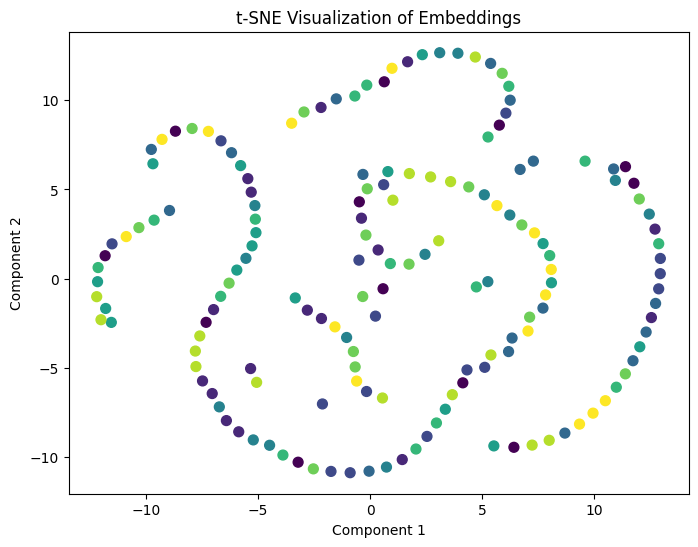

In [70]:
import umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(emb)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=50)

plt.title("t-SNE Visualization of Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\khani\AppData\Local\Temp\ipykernel_23376\430317278.py:11: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



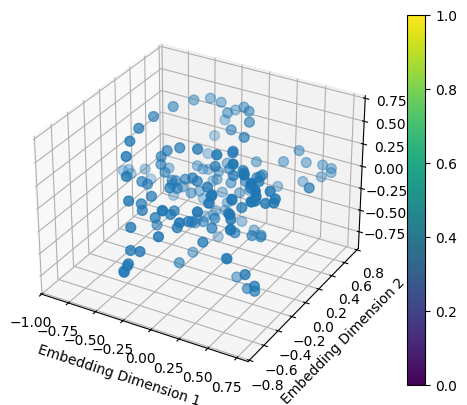

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = emb[:, 0]
y = emb[:, 1]
z = emb[:, 2]

sc = ax.scatter(x, y, z, cmap='viridis', s=50) 
plt.colorbar(sc)
ax.set_xlabel('Embedding Dimension 1')
ax.set_ylabel('Embedding Dimension 2')
ax.set_zlabel('Embedding Dimension 3')

plt.show()

In [76]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(emb, y_train)
y_pred = clf.predict(emb_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.1
